# Part II - (Factors that determine Bike Trip Duration)
## by (Kommomo Usang)



## Investigation Overview


> The goal of this investigation was to ascertain the factors that determine the duration of a trip using the Ford GoBike trip system which contained approximately 184,000 individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February 2019. I achieved this by investigating, analysing, exploring and communicating findings as regards my goal statement.


## Dataset Overview

> This dataset contains data associated with approximately 184,000 individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February 2019. The dataset initially contained 183,412 entries with 16 features such as duration_sec, start_station_id, start_station_latitude,	start_station_longitude,	end_station_id,	end_station_latitude,	end_station_longitude,	bike_id,	member_birth_year, start_time, end_time, usertype, bike_share_for_all_trip,  member_gender, start_station_name and end_station_name. In the course of my wrangling, i had to extract new columns from the existing ones and remove some columns that were not necessary to my goals. While wrangling, i discovered some data quality issues like incorrect data type, missing values, long column names, and a lot of extraneous columns that required cleaning. At the end of my cleaning process, i had 174,952 entries and 15 columns to work with.



In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the cleaned dataset after wrangling (ford-gobiketrip_master.csv) into a pandas dataframe
biketrip = pd.read_csv('ford-gobiketrip_master.csv')
biketrip

,Unnamed: 0,start_station_id,end_station_id,bike_id,user_type,m_gender,bike_share_for_all_trip,duration,m_age,start_hr,end_hr,start_date,end_date,start_weekday,end_weekday
0,0,21.0,13.0,4902,Customer,Male,No,869,38,17,8,2019-02-28,2019-03-01,Thursday,Friday
1,2,86.0,3.0,5905,Customer,Male,No,1030,50,12,5,2019-02-28,2019-03-01,Thursday,Friday
2,3,375.0,70.0,6638,Subscriber,Other,No,608,33,17,4,2019-02-28,2019-03-01,Thursday,Friday
3,4,7.0,222.0,4898,Subscriber,Male,Yes,26,48,23,0,2019-02-28,2019-03-01,Thursday,Friday
4,5,93.0,323.0,5200,Subscriber,Male,No,29,63,23,0,2019-02-28,2019-03-01,Thursday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,27.0,324.0,4832,Subscriber,Male,No,8,26,0,0,2019-02-01,2019-02-01,Friday,Friday
174948,183408,21.0,66.0,4960,Subscriber,Male,No,5,38,0,0,2019-02-01,2019-02-01,Friday,Friday
174949,183409,278.0,277.0,3824,Subscriber,Male,Yes,2,32,0,0,2019-02-01,2019-02-01,Friday,Friday
174950,183410,220.0,216.0,5095,Subscriber,Male,No,2,34,0,0,2019-02-01,2019-02-01,Friday,Friday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Duration (mins))

> Duration is a discrete variable and has a lot of data points-426, making it difficult to visualize significant information using a standard scaled plot. Transforming duration variable to a log scale makes the distribution clearer while providing significant information. On a log scale, the distribution is right skewed and unimodal with highest frequency at 5mins and peak region between 4 and 10mins. This implies that the fastest trips were completed between 4 and 10mins with 5mins as its highest frequency. Specifically, the number of trips completed in 5 mins are 15,073 trips 


I've used a histogram to show the distribution of trip duration on a log scale to visualize more and clearer information My plot has a long tail in the distribution and is right skewed and unimodal with highest frequency at 5mins and peak region between 4 and 10mins From the plot, it is clear that the fastest trips were completed between 4 and 10mins


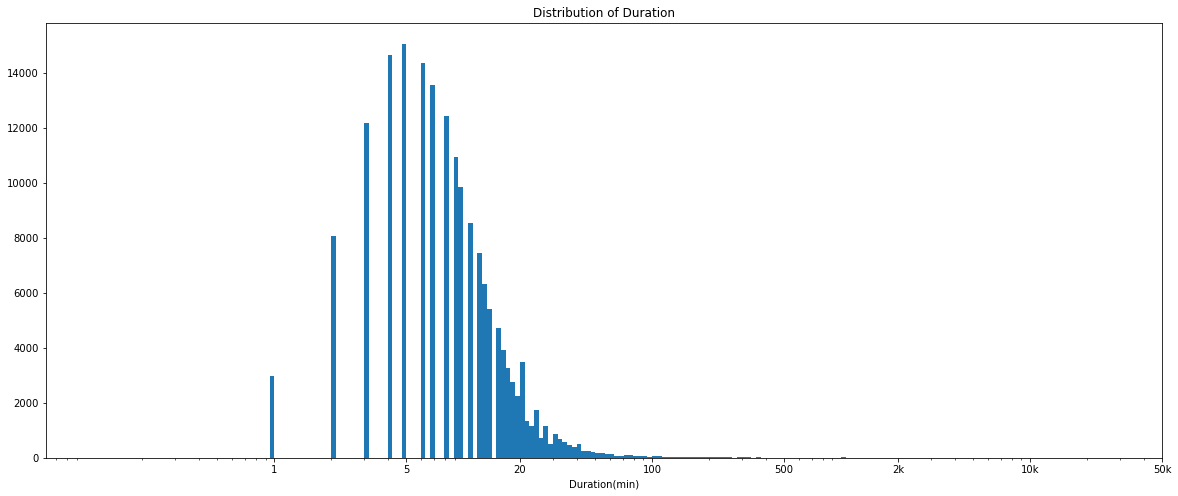

In [21]:
# there's a long tail in the distribution, so i'll put it on a log scale instead
def logduration():
    sol_string = ["I've used a histogram to show the distribution of trip duration on a log scale to visualize more and clearer information",
                      "My plot has a long tail in the distribution and is right skewed and unimodal with highest frequency at 5mins and peak region between 4 and 10mins", 
               "From the plot, it is clear that the fastest trips were completed between 4 and 10mins"]
                      
    print((" ").join(sol_string))
    log_binsize = 0.025
    bins = 10 ** np.arange(-1, np.log10(biketrip['duration'].max())+log_binsize, log_binsize)

    plt.figure(figsize=[20, 8])
    plt.hist(data = biketrip, x = 'duration', bins = bins)
    plt.xscale('log')
    plt.xticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k','10k','50k'])
    plt.xlabel('Duration(min)')
    plt.title('Distribution of Duration')
    plt.show()
    
logduration()

## (Distribution of Age)

> Age is a discrete variable and has 75 data points as a result, plotting using a standart scaled plot does not reveal as much information as is needed to get significant insights. Transforming age variable to a log scale makes the distribution clearer while providing significant information. On a log scale, the distribution is right skewed and unimodal with highest frequency at 34 years and peak region between 29 and 45 years of age. Specifically, the number of members at 34 years are 10,214.


On a log scale, my plot is still unimodal and right skewed with peak at 34 years of age


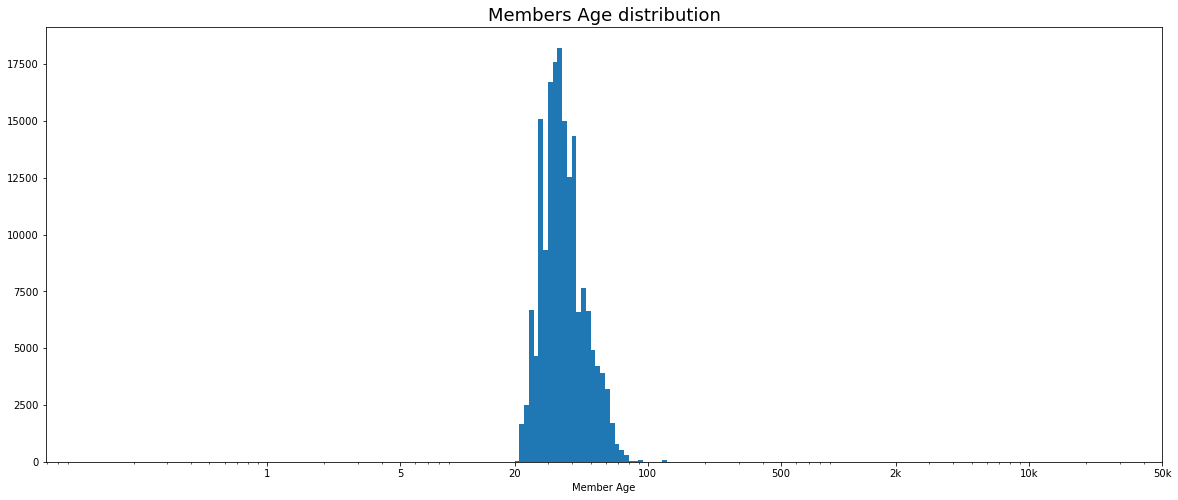

In [22]:
# there's a long tail in the distribution, so i'll put it on a log scale instead
def memberage():
    sol_string = ["On a log scale, my plot is still unimodal and right skewed with peak at 34 years of age"]
    print((" ").join(sol_string))
    log_binsize = 0.025
    bins = 10 ** np.arange(-1, np.log10(biketrip['m_age'].max())+log_binsize, log_binsize)

    plt.figure(figsize=[20, 8])
    plt.hist(data = biketrip, x = 'm_age', bins = bins)
    plt.xscale('log')
    plt.xticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.xlabel('Member Age')
    plt.title('Members Age distribution', fontsize=18)
    
    plt.show()
    
memberage()

## (Duration and Member Age)

> Duration and Age are both discrete variables with enormous data points, i visualized this interaction with both a scatter plot and a heatmap. For this presentation, i will focus on the heatmap 

> My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher counts while the cells with the darker and purple color have lower counts. It is clear from both plots that members between the ages of 20 & 40 are more likely to complete trips in shorter times. Approximately 903 members at 34 years of age completed trips in 6 mins




My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher counts while the cells with the darker and purple color have lower counts


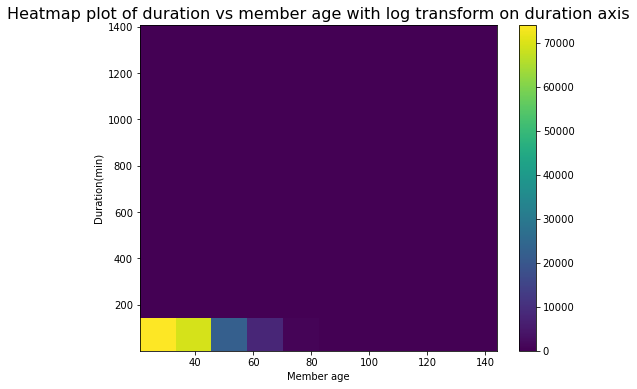

In [11]:
# Since the points are enormous,and both variables are discrete, i will plot using a heatmap 
def agevsduration():
    
    sol_string = ["My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher",
                  "counts while the cells with the darker and purple color have lower counts"]                      
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])

    plt.hist2d(data = biketrip, x = 'm_age', y = 'duration')
    plt.colorbar()
    plt.xlabel('Member age')
    plt.ylabel('Duration(min)');
    plt.title('Heatmap plot of duration vs member age with log transform on duration axis', fontsize=16)
    plt.show()
    
agevsduration()

## (Duration and User type)

> Duration and Age are both discrete variables with enormous data points, i visualized this interaction with both a scatter plot and a heatmap. For this presentation, i will focus on the heatmap 

> My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher counts while the cells with the darker and purple color have lower counts. It is clear from both plots that members between the ages of 20 & 40 are more likely to complete trips in shorter times. Specifically 14,274 subscribers completed trips in 5 mins




My boxplot is plotted with a log transform on duration axiss. It clearly shows a strong correlation between user type and trip duration


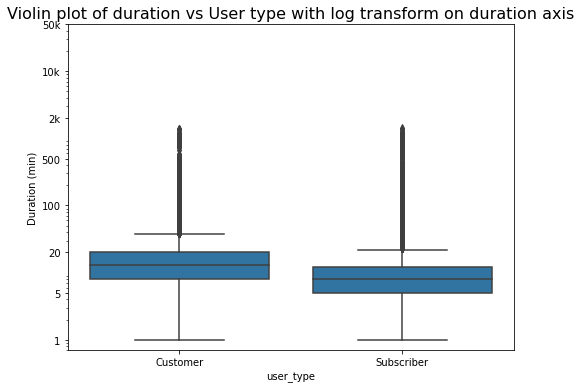

In [23]:
def usertypevsduration():
    
    sol_string = ["My boxplot is plotted with a log transform on duration axiss."
                  " It clearly shows a strong correlation between user type and trip duration"]
                                     
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])
    base_color = sb.color_palette()[0]
    sb.boxplot(data = biketrip, x = 'user_type', y = 'duration', color = base_color)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.ylabel('Duration (min)')
    plt.title('Violin plot of duration vs User type with log transform on duration axis', fontsize=16)
    plt.show()
usertypevsduration()

## (Duration and Member Age by User type)

> I used a non positional encoding - color to represent my 3rd variable- usertype. From my plot it is clear that the data points for the subscriber user which is encoded using a thicker shade of blue is consistently lined around the shortest duration which is btw 5-10 mins From my plot it is clear that the data points for the subscriber user is consistently lined around the shortest duration which is btw 5-10 mins. This implies that subscribers between ages of 20 and 45 had the shortest duration of trip, they completed their trips faster. Thus, age and usertype together are a strong combination to predicting how fast a trip can be completed. Specifically 859 subscribers at 34 years completed trips in 6 mins 


I used a non positional encoding 'color' to represent my 3rd variable- usertype. From my plot it is clear that the data points for the subscriber user which is encoded using a thicker shade of blue is  consistently lined around the shortest duration which is btw 5-10 mins


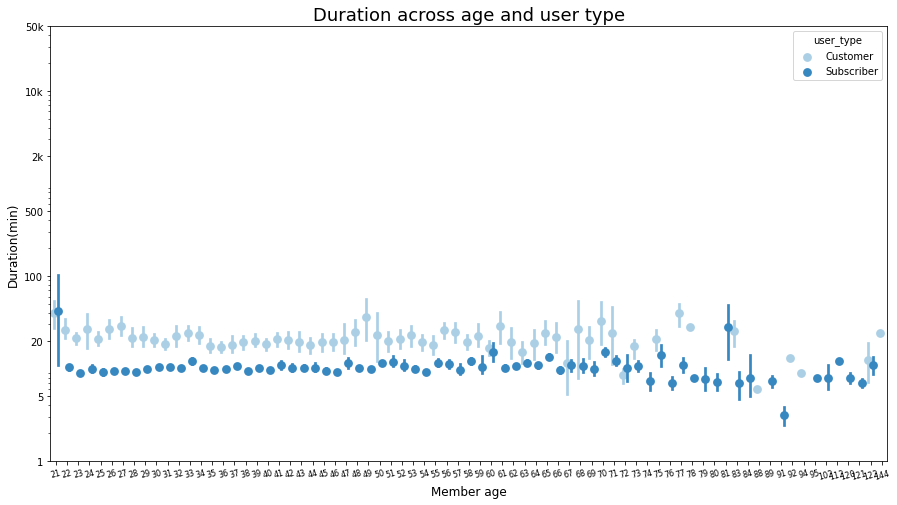

In [13]:
def durationvsagevsusertype():
    sol_string = ["I used a non positional encoding 'color' to represent my 3rd variable- usertype. From my plot it is", 
                  "clear that the data points for the subscriber user which is encoded using a thicker shade of blue is ",
                  "consistently lined around the shortest duration which is btw 5-10 mins"]
                                     
    print((" ").join(sol_string))
    fig = plt.figure(figsize = [15,8])
    ax = sb.pointplot(data = biketrip, x = 'm_age', y = 'duration', hue = 'user_type',
               palette = 'Blues', linestyles = '', dodge = 0.4)
    plt.title('Duration across age and user type', fontsize=18)
    plt.ylabel('Duration(min)', fontsize=12)
    plt.xlabel('Member age', fontsize=12)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    ax.set_yticklabels([],minor = True)
    plt.xticks(rotation=15,fontsize=8)
    plt.show();
    
durationvsagevsusertype()

## (Duration and Member Age by Gender)

> I used a non positional encoding -color to represent my 3rd variable- gender. From my plot it is clear that the data points for the male gender which is encoded using a light shade of blue is consistently lined around the shortest duration which is btw 5-10 mins. So we can conclude that the Males between the ages of 20 and 45 are more likely to complete their trips in the shortest time. Specifically, 668 Male members at 29 years completed trips in 5 mins




I used a non positional encoding 'color' to represent my 3rd variable- gender. From my plot it is clear that the data points for the male gender which is encoded using a light shade of blue is consistently lined around the shortest duration which is btw 5-10 mins


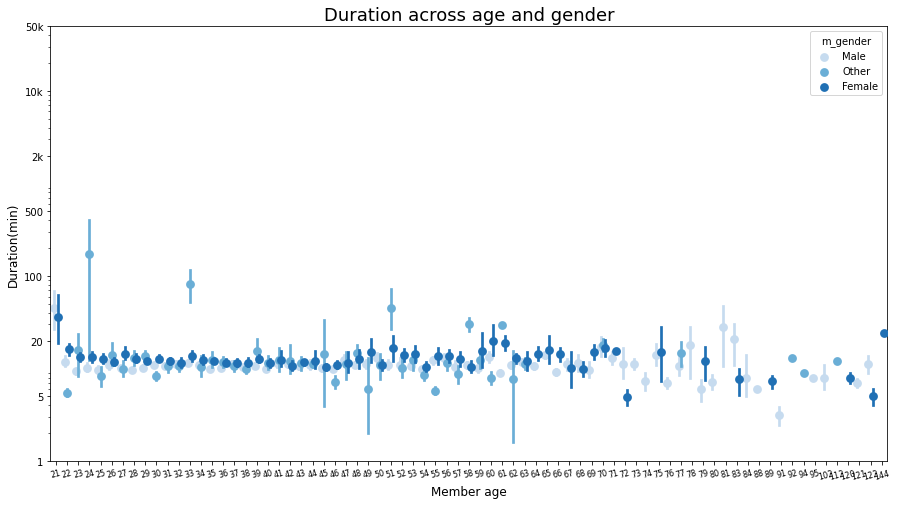

In [24]:
def durationvsagevsgender():
    sol_string = ["I used a non positional encoding 'color' to represent my 3rd variable- gender.", 
                   "From my plot it is clear that the data points for the male gender which is encoded using a light shade",
                  "of blue is consistently lined around the shortest duration which is btw 5-10 mins"]
                                     
    print((" ").join(sol_string))
    fig = plt.figure(figsize = [15,8])
    ax = sb.pointplot(data = biketrip, x = 'm_age', y = 'duration', hue = 'm_gender',
               palette = 'Blues', linestyles = '', dodge = 0.4)
    plt.title('Duration across age and gender', fontsize=18)
    plt.ylabel('Duration(min)', fontsize=12)
    plt.xlabel('Member age', fontsize=12)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,2e3,1e4,5e4], [1,5,20,100,500,'2k','10k','50k'])
    ax.set_yticklabels([],minor = True)
    plt.xticks(rotation=15,fontsize=8)
    plt.show();
    
durationvsagevsgender()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 